In [1]:
import scipy
from scipy.optimize import minimize
import numpy as np
import scipy.special as sc
import random
#from scipy.stats import bernoulli
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

                 Frequency
Num of mistakes           
-0.035                   1
-0.029                   1
-0.023                   1
-0.019                   1
-0.018                   3
-0.017                   1
-0.015                   1
-0.012                   2
-0.011                   2
-0.010                   2
-0.009                   6
-0.008                   2
-0.007                   6
-0.006                   4
-0.005                   5
-0.004                   5
-0.003                   3
-0.002                   5
-0.001                   2
 0.000                   5
 0.001                   3
 0.002                   2
 0.003                   5
 0.004                   5
 0.005                   3
 0.006                   3
 0.007                   1
 0.009                   3
 0.010                   2
 0.011                   2
 0.013                   3
 0.016                   4
 0.017                   2
 0.018                   1
 0.023                   1
 

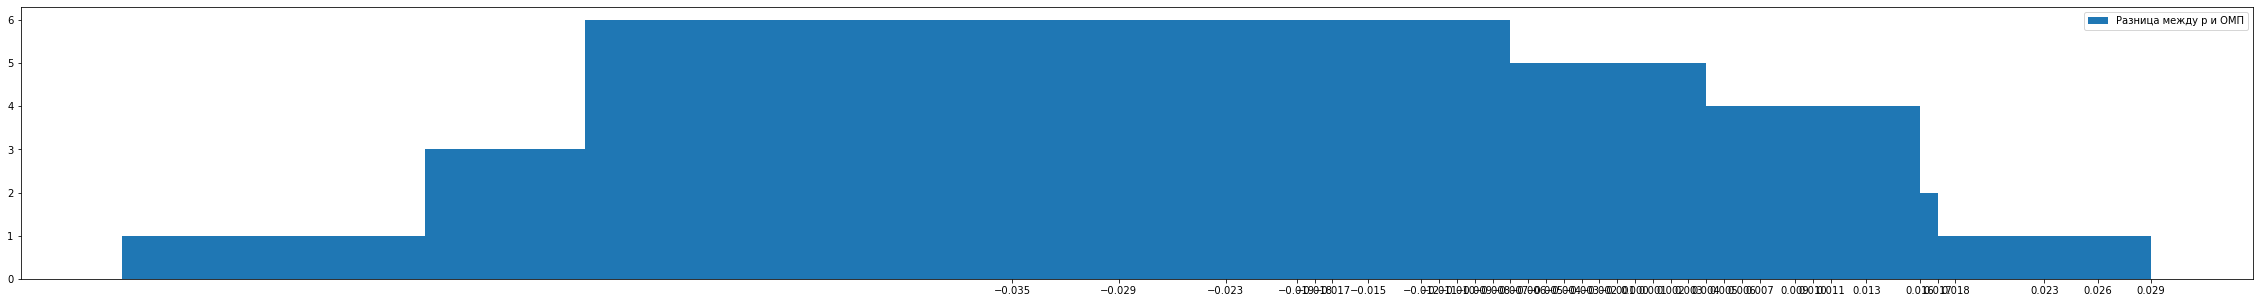

In [5]:
p0=0.9
a_1=3
b_1=2
a_0=2
b_0=0.5
n=1000 #число испытаний в серии
m=100 #число серий
delta = np.zeros(m)

#Генерирую бернуллиевские величины (пожар/непожар)
#Y = np.zeros(n)
#np.random.seed(seed=42)
for l in range(m):
    from scipy.stats import bernoulli #без этой строчки не отрабатывает почему-то
    Y = bernoulli.rvs(size=n,p=p0) 
    #print(Y)

#генерирую p_i
    p_i = np.zeros(n)
    for j in range(n):
        if Y[j]==0:
            p_i[j]=random.betavariate(a_0,b_0)
        else:
            p_i[j]=random.betavariate(a_1,b_1)
        
    def L(p):
        nominator=(p**sum(Y)) * ((1-p)**(n-sum(Y)))
        for j in range(n):
            nominator*=(((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))**(1-Y[j])) * (((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))**Y[j])
        denominator=1
        for j in range(n):
            denominator*=((1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)) + (p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))
        return nominator/denominator
    #print(L(p0))

    p = Symbol('p')

#Выписываю формулу производной (вывела на листке руками)
    def Deriv(p):
        slag=0
        for j in range(n):
            nom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)
            denom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)
            slag+=Y[j] - nom/denom
        return slag

#Выписываю формулу производной (вывела на листке руками)
    def Sec_Deriv(p):
        slag=0
        for j in range(n):
            nom=((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))*((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))
            denom=(p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))**2
            slag+=nom/denom
        return slag

    OMM=(sum(p_i)/n - a_0/(a_0+b_0)) * ((a_1+b_1)*(a_0+b_0)/(a_1*b_0-a_0*b_1))

#Выписываю уравнение для приближенного ОМП
    eq=Deriv(OMM) + Sec_Deriv(OMM)*(OMM-p)
    res3=solve(eq,p)
    #print('Точка максимума:',res3[0])
    delta[l]=round(p0-res3[0],3)

data = pd.DataFrame(data={"Num of mistakes": list(round(delta[i],3) for i in range(0,m)),
                          "Frequency": list(1 for i in range(0,m))})
#print(data)
sum_points = data.groupby("Num of mistakes") \
                 .agg({"Frequency": "sum"})
print(sum_points)

x = np.array(sum_points["Frequency"].index)  
width = 0.05
fig, ax = plt.subplots(figsize=(40,5))
rects1 = ax.bar(x - width/2, sum_points["Frequency"], width, label='Разница между p и ОМП')
#rects2 = ax.bar(x + width/2, sum_points["Frequency"][:50], width, label='Разница между p и ОМП')

#ax.set_ylabel('cm')
ax.set_xticks(x)
ax.legend()

In [59]:
#print('a_1=2, b_1=1, a_0=1, b_0=2, p=0.9')
#print('Число наблюдений: 1000, Число серий: 30')
#print(sum_points)
#plt.bar(sum_points.index, sum_points["Frequency"])

In [60]:
#fig, axs = plt.subplots(1, 2)
#n_bins = len(sum_points)
#axs[0].hist(sum_points["Frequency"], bins=n_bins)
#axs[0].set_title('sepal length')
#axs[1].hist(sum_points["Frequency"], bins=n_bins)
#axs[1].set_title('petal length')

In [61]:
#import seaborn as sns
#sns_plot = sns.distplot(sum_points["Frequency"])
#fig = sns_plot.get_figure()

                 Frequency
Num of mistakes           
-0.037                   1
-0.031                   1
-0.026                   1
-0.025                   1
-0.022                   1
-0.021                   1
-0.020                   2
-0.019                   1
-0.016                   3
-0.015                   2
-0.014                   3
-0.013                   3
-0.012                   1
-0.011                   3
-0.010                   2
-0.009                   2
-0.007                   4
-0.006                   1
-0.005                   2
-0.004                   5
-0.003                   6
-0.002                   2
-0.001                   3
 0.000                   2
 0.001                   2
 0.002                   1
 0.003                   5
 0.004                   6
 0.006                   1
 0.007                   3
 0.008                   6
 0.009                   4
 0.010                   3
 0.012                   2
 0.013                   2
 

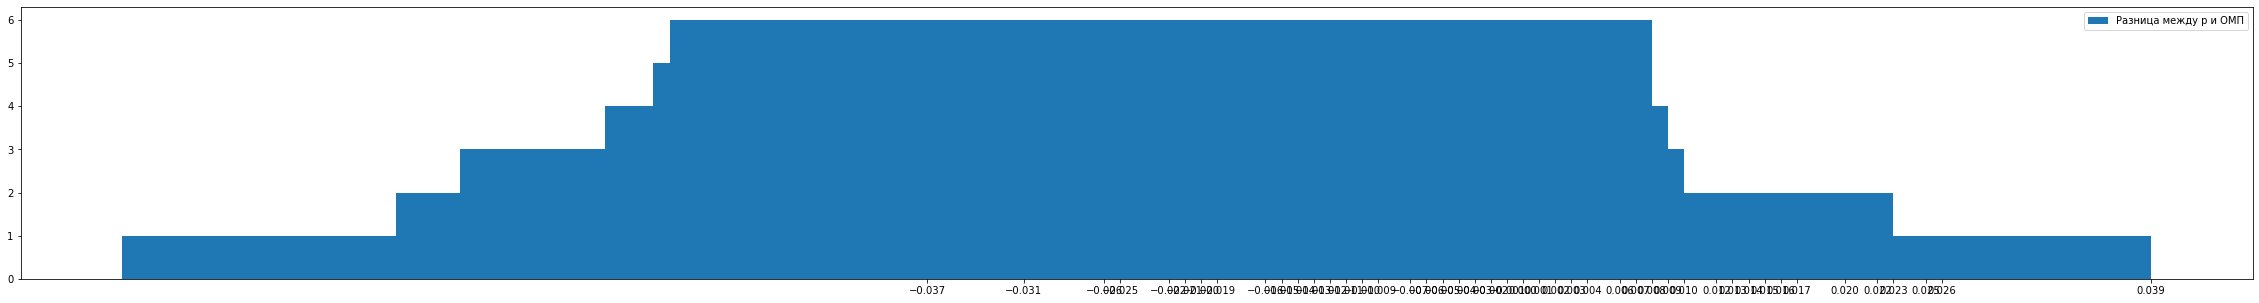

In [7]:
p0=0.2
a_1=3
b_1=2
a_0=2
b_0=0.5
n=1000 #число испытаний в серии
m=100 #число серий
delta = np.zeros(m)

#Генерирую бернуллиевские величины (пожар/непожар)
#Y = np.zeros(n)
#np.random.seed(seed=42)
for l in range(m):
    from scipy.stats import bernoulli #без этой строчки не отрабатывает почему-то
    Y = bernoulli.rvs(size=n,p=p0) 
    #print(Y)

#генерирую p_i
    p_i = np.zeros(n)
    for j in range(n):
        if Y[j]==0:
            p_i[j]=random.betavariate(a_0,b_0)
        else:
            p_i[j]=random.betavariate(a_1,b_1)
        
    def L(p):
        nominator=(p**sum(Y)) * ((1-p)**(n-sum(Y)))
        for j in range(n):
            nominator*=(((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))**(1-Y[j])) * (((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))**Y[j])
        denominator=1
        for j in range(n):
            denominator*=((1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)) + (p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))
        return nominator/denominator
    #print(L(p0))

    p = Symbol('p')

#Выписываю формулу производной (вывела на листке руками)
    def Deriv(p):
        slag=0
        for j in range(n):
            nom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)
            denom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)
            slag+=Y[j] - nom/denom
        return slag

#Выписываю формулу производной (вывела на листке руками)
    def Sec_Deriv(p):
        slag=0
        for j in range(n):
            nom=((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))*((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))
            denom=(p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))**2
            slag+=nom/denom
        return slag

    OMM=(sum(p_i)/n - a_0/(a_0+b_0)) * ((a_1+b_1)*(a_0+b_0)/(a_1*b_0-a_0*b_1))

#Выписываю уравнение для приближенного ОМП
    eq=Deriv(OMM) + Sec_Deriv(OMM)*(OMM-p)
    res3=solve(eq,p)
    #print('Точка максимума:',res3[0])
    delta[l]=round(p0-res3[0],3)

data = pd.DataFrame(data={"Delta": list(round(delta[i],3) for i in range(0,m)),
                          "Frequency": list(1 for i in range(0,m))})
#print(data)
sum_points = data.groupby("Delta") \
                 .agg({"Frequency": "sum"})
print(sum_points)

x = np.array(sum_points["Frequency"].index)  
width = 0.05
fig, ax = plt.subplots(figsize=(40,5))
rects1 = ax.bar(x - width/2, sum_points["Frequency"], width, label='Разница между p и ОМП')
#rects2 = ax.bar(x + width/2, sum_points["Frequency"][:50], width, label='Разница между p и ОМП')

#ax.set_ylabel('cm')
ax.set_xticks(x)
ax.legend()

        Frequency
Delta            
-0.079          1
-0.054          1
-0.051          1
-0.049          1
-0.048          1
-0.046          1
-0.042          2
-0.038          1
-0.037          1
-0.033          1
-0.030          2
-0.028          1
-0.027          1
-0.024          3
-0.023          4
-0.022          1
-0.020          1
-0.019          1
-0.018          5
-0.017          2
-0.016          3
-0.015          3
-0.014          3
-0.013          1
-0.012          4
-0.011          7
-0.010          2
-0.009          1
-0.008          3
-0.007          2
-0.006          1
-0.005          2
-0.004          4
-0.003          3
-0.002          4
-0.001          1
 0.000          4
 0.002          4
 0.003          2
 0.005          3
 0.006          1
 0.007          1
 0.008          1
 0.009          1
 0.010          1
 0.012          2
 0.013          1
 0.015          1
 0.016          1
 0.017          1


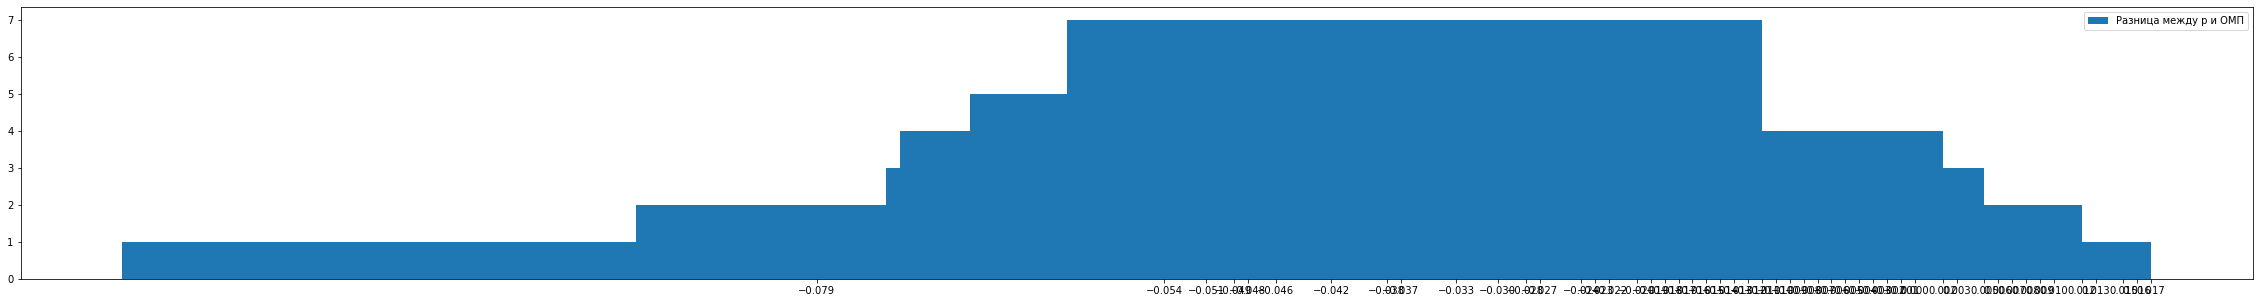

In [3]:
#ПОПРАВИЛА ПРОИЗВОДНУЮ 1 и 2!!!!!! + исправила арифм ошибки
p0=0.9
a_1=3
b_1=2
a_0=2
b_0=0.5
n=1000 #число испытаний в серии
m=100 #число серий
delta = np.zeros(m)

#Генерирую бернуллиевские величины (пожар/непожар)
#Y = np.zeros(n)
#np.random.seed(seed=42)
for l in range(m):
    from scipy.stats import bernoulli #без этой строчки не отрабатывает почему-то
    Y = bernoulli.rvs(size=n,p=p0) 
    #print(Y)

#генерирую p_i
    p_i = np.zeros(n)
    for j in range(n):
        if Y[j]==0:
            p_i[j]=random.betavariate(a_0,b_0)
        else:
            p_i[j]=random.betavariate(a_1,b_1)
        
    def L(p):
        nominator=(p**sum(Y)) * ((1-p)**(n-sum(Y)))
        for j in range(n):
            nominator*=(((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))**(1-Y[j])) * (((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))**Y[j])
        denominator=1
        for j in range(n):
            denominator*=((1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)) + (p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))
        return nominator/denominator
    #print(L(p0))

    p = Symbol('p')

#Выписываю формулу производной (вывела на листке руками)
    def Deriv(p):
        slag=0
        for j in range(n):
            nom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)
            denom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)
            slag+=Y[j] - nom/denom
        return slag/(p*(1-p))

#Выписываю формулу производной (вывела на листке руками)
    def Sec_Deriv(p):
        slag1=0
        slag2=0
        for j in range(n):
            nom1=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)
            nom2=((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))*((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))
            denom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)
            slag1+=Y[j]-nom1/denom
            slag2+=nom2/(denom**2)
        return -(1-2*p)*slag1/((p*(1-p))**2)-slag2/(p*(1-p))

    OMM=(sum(p_i)/n - a_0/(a_0+b_0)) * ((a_1+b_1)*(a_0+b_0)/(a_1*b_0-a_0*b_1))

#Выписываю уравнение для приближенного ОМП
    eq=Deriv(OMM) + Sec_Deriv(OMM)*(p-OMM)
    res3=solve(eq,p)
    #print('Точка максимума:',res3[0])
    delta[l]=p0-res3[0]

data = pd.DataFrame(data={"Delta": list(round(delta[i],3) for i in range(0,m)),
                          "Frequency": list(1 for i in range(0,m))})
#print(data)
sum_points = data.groupby("Delta") \
                 .agg({"Frequency": "sum"})
print(sum_points)

x = np.array(sum_points["Frequency"].index)  
width = 0.05
fig, ax = plt.subplots(figsize=(40,5))
rects1 = ax.bar(x - width/2, sum_points["Frequency"], width, label='Разница между p и ОМП')
#rects2 = ax.bar(x + width/2, sum_points["Frequency"][:50], width, label='Разница между p и ОМП')

#ax.set_ylabel('cm')
ax.set_xticks(x)
ax.legend()

        Frequency
Delta            
-0.108          1
-0.071          1
-0.069          1
-0.058          1
-0.057          1
-0.056          1
-0.054          1
-0.052          1
-0.048          1
-0.043          1
-0.038          2
-0.035          1
-0.034          1
-0.033          1
-0.032          1
-0.031          2
-0.030          1
-0.029          1
-0.028          1
-0.027          1
-0.024          1
-0.022          1
-0.021          3
-0.020          2
-0.019          1
-0.018          2
-0.014          6
-0.013          3
-0.012          1
-0.011          2
-0.010          1
-0.009          4
-0.008          3
-0.007          3
-0.006          1
-0.005          4
-0.004          2
-0.003          3
-0.002          3
-0.001          3
 0.000          5
 0.001          2
 0.002          1
 0.003          3
 0.004          2
 0.005          1
 0.006          1
 0.007          1
 0.008          4
 0.009          2
 0.010          1
 0.011          1
 0.013          1
 0.018    

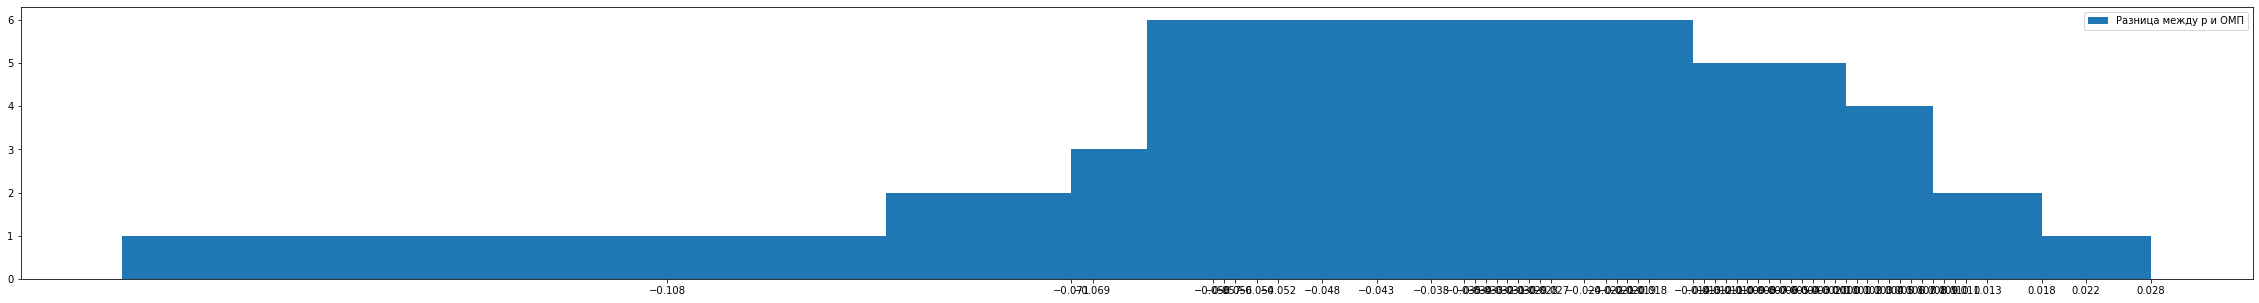

In [6]:
p0=0.9
a_1=3
b_1=2
a_0=2
b_0=0.5
n=1000 #число испытаний в серии
m=100 #число серий
delta = np.zeros(m)

#Генерирую бернуллиевские величины (пожар/непожар)
#Y = np.zeros(n)
#np.random.seed(seed=42)
for l in range(m):
    from scipy.stats import bernoulli #без этой строчки не отрабатывает почему-то
    Y = bernoulli.rvs(size=n,p=p0) 
    #print(Y)

#генерирую p_i
    p_i = np.zeros(n)
    for j in range(n):
        if Y[j]==0:
            p_i[j]=random.betavariate(a_0,b_0)
        else:
            p_i[j]=random.betavariate(a_1,b_1)
        
    def L(p):
        nominator=(p**sum(Y)) * ((1-p)**(n-sum(Y)))
        for j in range(n):
            nominator*=(((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))**(1-Y[j])) * (((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))**Y[j])
        denominator=1
        for j in range(n):
            denominator*=((1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)) + (p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))
        return nominator/denominator
    #print(L(p0))

    p = Symbol('p')

#Выписываю формулу производной (вывела на листке руками)
    def Deriv(p):
        slag=0
        for j in range(n):
            nom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)
            denom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)
            slag+=Y[j] - nom/denom
        return slag/(p*(1-p))

#Выписываю формулу производной (вывела на листке руками)
    def Sec_Deriv(p):
        slag1=0
        slag2=0
        for j in range(n):
            nom1=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)
            nom2=((p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1))*((p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0))
            denom=p*(p_i[j]**(a_1-1))*((1-p_i[j])**(b_1-1))/sc.beta(a_1,b_1)+(1-p)*(p_i[j]**(a_0-1))*((1-p_i[j])**(b_0-1))/sc.beta(a_0,b_0)
            slag1+=Y[j]-nom1/denom
            slag2+=nom2/(denom**2)
        return -(1-2*p)*slag1/((p*(1-p))**2)-slag2/(p*(1-p))

    OMM=(sum(p_i)/n - a_0/(a_0+b_0)) * ((a_1+b_1)*(a_0+b_0)/(a_1*b_0-a_0*b_1))

#Выписываю уравнение для приближенного ОМП
    eq=Deriv(OMM) + Sec_Deriv(OMM)*(p-OMM)
    res3=solve(eq,p)
    #print('Точка максимума:',res3[0])
    delta[l]=p0-res3[0]

data = pd.DataFrame(data={"Delta": list(round(delta[i],3) for i in range(0,m)),
                          "Frequency": list(1 for i in range(0,m))})
#print(data)
sum_points = data.groupby("Delta") \
                 .agg({"Frequency": "sum"})
print(sum_points)

x = np.array(sum_points["Frequency"].index)  
width = 0.05
fig, ax = plt.subplots(figsize=(40,5))
rects1 = ax.bar(x - width/2, sum_points["Frequency"], width, label='Разница между p и ОМП')
#rects2 = ax.bar(x + width/2, sum_points["Frequency"][:50], width, label='Разница между p и ОМП')

#ax.set_ylabel('cm')
ax.set_xticks(x)
ax.legend()